In [1]:
import pandas as analytics
import numpy as maths
import matplotlib.pyplot as graph
from math import exp , pi
# from numpy.linalg import inv, det
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_raw = analytics.read_csv('../data/Data1.csv')
df_raw = df_raw.drop('Unnamed: 0',axis=1)
df_raw = df_raw.rename(columns = {"0":'x',"1":'y'})
df_raw

,x,y
0,1.004939,2.319887
1,3.412653,-1.637157
2,7.483318,-1.399250
3,0.702826,2.038150
4,0.287620,2.191703
...,...,...
1595,1.475069,2.329653
1596,4.277030,2.183024
1597,0.814996,2.246927
1598,7.999698,-1.811024


<Axes: xlabel='x', ylabel='y'>

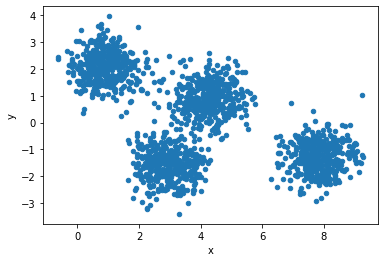

In [3]:
df_raw.plot('x','y',kind = 'scatter')

In [4]:
number_of_clusters = 4
number_of_datapoints = df_raw.shape[0]
number_of_attributes = df_raw.shape[1]

In [5]:
max_loops = 100

In [6]:
sigmas = maths.random.random(size=(number_of_clusters,number_of_attributes,number_of_attributes))
means = maths.random.random(size=(number_of_clusters,number_of_attributes,1))
probabilities = maths.random.random(size = number_of_clusters)
probabilities = probabilities/sum(probabilities)

In [7]:
print(means)
print("===")
print(sigmas)
print("===")
print(probabilities)

[[[0.69851429]
  [0.62607228]]

 [[0.16071921]
  [0.39599123]]

 [[0.40624756]
  [0.24146976]]

 [[0.08875964]
  [0.68253477]]]
===
[[[0.38126784 0.22897644]
  [0.80889285 0.61057558]]

 [[0.17589832 0.68177338]
  [0.01993909 0.45529458]]

 [[0.49408087 0.23321986]
  [0.44090005 0.26889396]]

 [[0.05649323 0.36521711]
  [0.61302496 0.58121378]]]
===
[0.16656325 0.2277895  0.27428897 0.33135827]


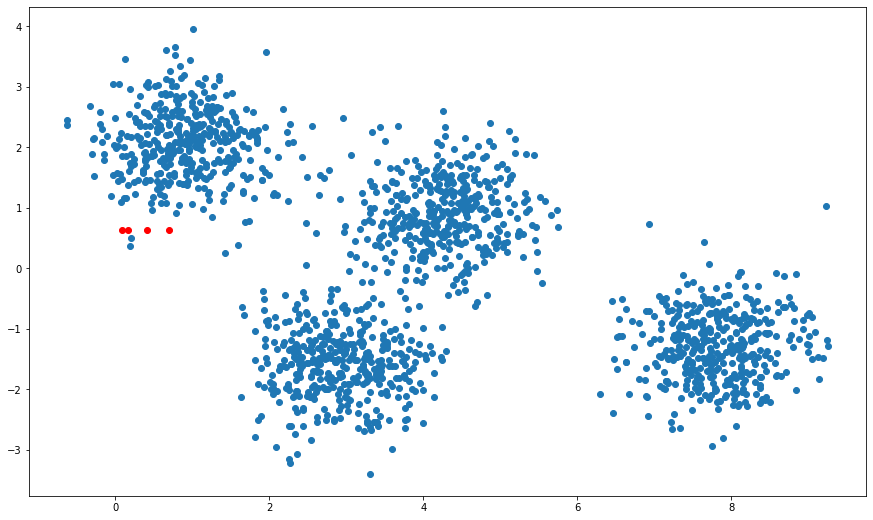

In [8]:
ratio = 6/10
width = 15
figsize = (width, width*ratio)
figure = graph.figure(figsize = figsize)
graph.scatter(df_raw['x'],df_raw['y'])
graph.scatter(means[0][0],means[0][1],c = 'red')
graph.scatter(means[1][0],means[0][1],c = 'red')
graph.scatter(means[2][0],means[0][1],c = 'red')
graph.scatter(means[3][0],means[0][1],c = 'red')

# Mk 2

In [9]:
def mahalonabis_distance(x,mean,inv) :
#     mean = maths.array(mean).reshape(-1,1)
    return float((x-mean).T @ inv @ (x-mean))

def multivariate_gaussian_distribution(x,mean,sigma_inv, sigma_det):
    n = len(x)
    exponential = exp (-0.5 * abs(mahalonabis_distance(x,mean,sigma_inv)))
    if exponential > 1: 
        raise ValueError('Exponential Limit crossed !!')
        # break
    else :
        p = ( 1 / ((2*pi)**n * abs(sigma_det))**0.5 ) * exp (-0.5 * abs(mahalonabis_distance(x,mean,sigma_inv)))
        # if p > 1 : raise ValueError('Probability Limit Exceeded than 1 !')
        # else : return p
        return p 

def normalise(p_i,number_of_datapoints,number_of_clusters):
    sum_i = []
    for i in range(number_of_datapoints):
        sum_j = []
        for j in range(number_of_clusters): sum_j.append(p_i[j][i])
        sum_i.append(sum(sum_j))
    
    for i in range(number_of_datapoints):
        for j in range(number_of_clusters):
            p_i[j][i] = p_i[j][i]/sum_i[i] 
    return p_i

In [10]:
df_copy = df_raw.copy()

In [11]:
df_copy['class'] = maths.random.randint(1,number_of_clusters+1,size = len(df_copy))
df_copy

,x,y,class
0,1.004939,2.319887,3
1,3.412653,-1.637157,4
2,7.483318,-1.399250,1
3,0.702826,2.038150,4
4,0.287620,2.191703,4
...,...,...,...
1595,1.475069,2.329653,3
1596,4.277030,2.183024,4
1597,0.814996,2.246927,4
1598,7.999698,-1.811024,2


In [62]:
def cluster_parameters(i,df_copy):
    df_sample = df_copy[df_copy['classes'] == i].drop('classes',axis = 1).copy()
    mean = df_sample.mean()
    df_sample = df_sample - mean
    mean = maths.array(mean).reshape(-1,1)
    sigma = maths.array(df_sample.T @ df_sample)
    probability = len(df_sample)
    return mean , sigma , probability

In [60]:
def initialisation(number_of_clusters, df_raw):
    df_copy = df_raw.copy()
    df_copy['classes'] = maths.random.randint(1,number_of_clusters+1,size = len(df_copy))
    means = []
    sigmas = []
    probabilities = []
    for cluster in range(1,number_of_clusters+1):
        mean, sigma, probability = cluster_parameters(cluster,df_copy)
        means.append(mean)
        sigmas.append(sigma)
        probabilities.append(probability)

    means = maths.array(means)
    sigmas = maths.array(sigmas)
    probabilities = maths.array(probabilities) / sum(probabilities)
    return means, sigmas, probabilities

In [14]:
initialisation(number_of_clusters, df_raw)

(array([[[ 4.10158183],
         [-0.01744516]],
 
        [[ 4.00732076],
         [ 0.09392095]],
 
        [[ 3.74791146],
         [ 0.00484675]],
 
        [[ 4.06371198],
         [ 0.05568768]]]),
 array([[[ 2875.15518976, -1071.65792169],
         [-1071.65792169,  1111.86770896]],
 
        [[ 2430.33146443,  -876.27375619],
         [ -876.27375619,  1065.04700352]],
 
        [[ 2640.72636489,  -889.58999561],
         [ -889.58999561,  1062.34331247]],
 
        [[ 2652.51148034,  -927.02204398],
         [ -927.02204398,  1026.9628591 ]]]),
 array([0.259375, 0.243125, 0.254375, 0.243125]))

In [15]:
sigmas

array([[[0.38126784, 0.22897644],
        [0.80889285, 0.61057558]],

       [[0.17589832, 0.68177338],
        [0.01993909, 0.45529458]],

       [[0.49408087, 0.23321986],
        [0.44090005, 0.26889396]],

       [[0.05649323, 0.36521711],
        [0.61302496, 0.58121378]]])

In [16]:
means = []
df_copy = df_raw.copy()
[means.append(maths.array(df_copy.sample(frac = 1/number_of_clusters,replace = False).mean()).reshape(-1,1)) for i in range(number_of_clusters)]
means = maths.array(means)
means

array([[[ 3.88843445],
        [-0.01591381]],

       [[ 3.88704046],
        [ 0.10602292]],

       [[ 4.15018325],
        [-0.1194413 ]],

       [[ 3.95243611],
        [ 0.04091519]]])

In [17]:
means = maths.random.random((number_of_clusters,number_of_attributes,1))
means[1]

array([[0.81726149],
       [0.34249861]])

In [18]:
probabilities = maths.ones(number_of_clusters)
probabilities = probabilities/number_of_clusters
probabilities

array([0.25, 0.25, 0.25, 0.25])

[0.39495434 0.22969238 0.08080513 0.29454815]


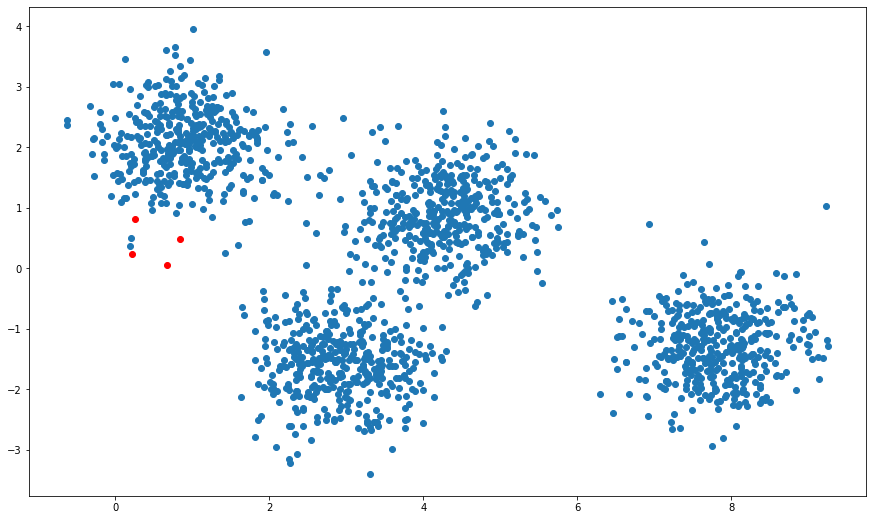

In [75]:
sigmas = maths.random.random(size=(number_of_clusters,number_of_attributes,number_of_attributes))
means = maths.random.random((number_of_clusters,number_of_attributes,1))
# means = maths.zeros((number_of_clusters,number_of_attributes,1))
# means = []
# [means.append(list(df_raw.sample(frac = 1/number_of_clusters).mean())) for i in range(number_of_clusters)]
# means = maths.array(means)

# means = []
# df_copy = df_raw.copy()
# [means.append(maths.array(df_copy.sample(frac = 1/number_of_clusters,replace = False).mean()).reshape(-1,1)) for i in range(number_of_clusters)]
# means = maths.array(means)

probabilities = maths.random.random(size = number_of_clusters)
probabilities = probabilities/sum(probabilities)
print(probabilities)

# means , sigmas , probabilities = initialisation(number_of_clusters, df_raw)
# probabilities = maths.random.random(size = number_of_clusters)
# probabilities = probabilities/sum(probabilities)
# print(probabilities)


ratio = 6/10
width = 15
figsize = (width, width*ratio)
figure = graph.figure(figsize = figsize)
graph.scatter(df_raw['x'],df_raw['y'])
graph.scatter(means[0][0],means[0][1],c = 'red')
graph.scatter(means[1][0],means[1][1],c = 'red')
graph.scatter(means[2][0],means[2][1],c = 'red')
graph.scatter(means[3][0],means[3][1],c = 'red')
loop = 0
errors = []

In [30]:
# maths.linalg.norm(probabilities_old - probabilities) > tolerance

In [31]:
# maths.linalg.norm(probabilities - 1/number_of_clusters)

In [32]:
# tolerance

In [83]:
tolerance = 1e-1

max_loops = 10

p_ij = 2
p_ij_old = p_ij - 1
errors = []
loop = 0

p_ij = maths.matrix(p_ij) - 1.5
means = means - 1.5
sigmas = sigmas -1.5


# while maths.linalg.norm(probabilities_old - probabilities) > tolerance :
while maths.linalg.norm(probabilities - (1/number_of_clusters)) > tolerance :
    

    p_i = []
    probabilities_old = probabilities - 1
    
    print("HI")
    if loop > 1 and abs(errors[-2]/errors[-1] - 1 )< tolerance :
        print(f"Converged at {errors[-1]:.3} ! Changing parameters !")
        p_ij = maths.matrix(p_ij) - 1
        means = means - 1
        sigmas = sigmas - 1
        
        if (errors[-2]/errors[-1] - 1 )< tolerance :
            p_ij = maths.matrix(p_ij) - 1
            means = means - 1
            sigmas = sigmas -1 
        if (errors[-2]/errors[-1] - 1 ) > tolerance :
            p_ij = maths.matrix(p_ij) + 1
            means = means + 1
            sigmas = sigmas + 1 
#       
#         break;

#     print("HERE")

    while maths.linalg.norm(means_old - means) > tolerance or maths.linalg.norm(sigmas_old - sigmas) > tolerance:
#     or loop < max_loops :
#     while maths.linalg.norm(maths.matrix(p_ij) - maths.matrix(p_ij_old)) > tolerance :
    # while maths.linalg.norm(probabilities - (1/number_of_clusters)) > tolerance :
        errors.append(maths.linalg.norm(probabilities - (1/number_of_clusters)))
        print(errors[-1])
        p_ij_old = p_ij
        means_old = means.copy()
        sigmas_old = sigmas.copy()
        
        loop = loop + 1
        sigmas_old = sigmas.copy()
        probabilities_old = probabilities.copy()
        means_old = means.copy()
        for cluster in range(number_of_clusters):
            sigma = sigmas[cluster] 
            mean = means[cluster]
            probability = probabilities[cluster]
            p_ij = []
            det = maths.linalg.det(sigma)
            inv = maths.linalg.inv(sigma)
            for x in df_raw.itertuples(index = False, name = None):
                x = maths.matrix(x).reshape(-1,1)
                p_ij.append((probability * multivariate_gaussian_distribution(x,mean,inv,det) ))
            p_i.append(p_ij)

        p_i = normalise(p_i,number_of_datapoints,number_of_clusters)

        for cluster in range(number_of_clusters):
            p_ij = p_i[cluster]
            sum_cluster = sum(p_ij)

            mean = 0
            for j in range(number_of_datapoints) :
                mean = mean + p_ij[j]/sum_cluster * df_raw.iloc[j]
            means[cluster] = maths.matrix(mean).T

            sigma = 0 
            for j in range(number_of_datapoints) :
                x = maths.matrix(df_raw.iloc[j]).T
                sigma = sigma + (p_ij[j] / (sum_cluster - 1)) * (x - means[cluster]) @ (x - means[cluster]).T
            sigmas[cluster] = sigma

            probabilities[cluster] = sum_cluster/number_of_datapoints

print("Answer Reached !")

HI
0.1821692719839711
0.3029946803994391
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI

HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
H

HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
H

HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
H

HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
H

HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
H

HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
H

HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
H

HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
H

HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
H

HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
H

HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
H

HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
H

HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
H

HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
H

HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
H

HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
H

HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
HI
H

KeyboardInterrupt: 

In [77]:
errors

[0.22811313414356651, 0.7112293903359124]

[[[ 2.89744447]
  [ 1.23415867]]

 [[ 4.76812018]
  [-0.69908177]]

 [[ 3.75572229]
  [ 0.27202587]]

 [[ 1.21245697]
  [ 2.11289742]]] 

 [0.1609521  0.55323205 0.20789278 0.07792307]


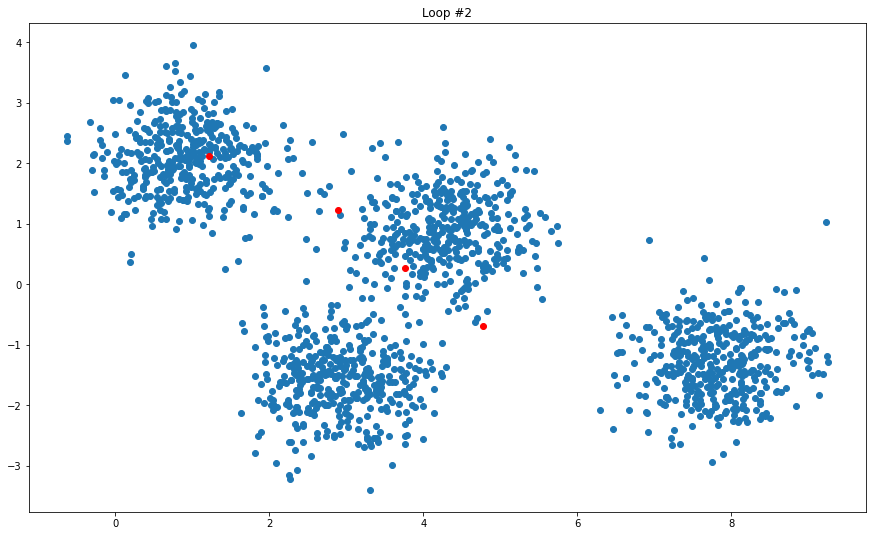

In [81]:
print(means,"\n\n" ,probabilities)
ratio = 6/10
width = 15
figsize = (width, width*ratio)
figure = graph.figure(figsize = figsize)
graph.title("Loop #"+str(loop))
graph.scatter(df_raw['x'],df_raw['y'])
graph.scatter(means[0][0],means[0][1],c = 'red')
graph.scatter(means[1][0],means[1][1],c = 'red')
graph.scatter(means[2][0],means[2][1],c = 'red')
graph.scatter(means[3][0],means[3][1],c = 'red')

# Mk 3

In [176]:
def mahalonabis_distance(x,mean,inv) :
#     mean = maths.array(mean).reshape(-1,1)
    return float((x-mean).T @ inv @ (x-mean))

def multivariate_gaussian_distribution(x,mean,sigma_inv, sigma_det):
    n = len(x)
    exponential = exp (-0.5 * abs(mahalonabis_distance(x,mean,sigma_inv)))
    if exponential > 1: 
        raise ValueError('Exponential Limit crossed !!')
        # break
    else :
        p = ( 1 / ((2*pi)**n * abs(sigma_det))**0.5 ) * exp (-0.5 * abs(mahalonabis_distance(x,mean,sigma_inv)))
        # if p > 1 : raise ValueError('Probability Limit Exceeded than 1 !')
        # else : return p
        return p 

def normalise(p_i,number_of_datapoints,number_of_clusters):
    sum_i = []
    for i in range(number_of_datapoints):
        sum_j = []
        for j in range(number_of_clusters): sum_j.append(p_i[j][i])
        sum_i.append(sum(sum_j))
    
    for i in range(number_of_datapoints):
        for j in range(number_of_clusters):
            p_i[j][i] = p_i[j][i]/sum_i[i] 
    return p_i

[0.53296304 0.26118432 0.05711452 0.14873812]


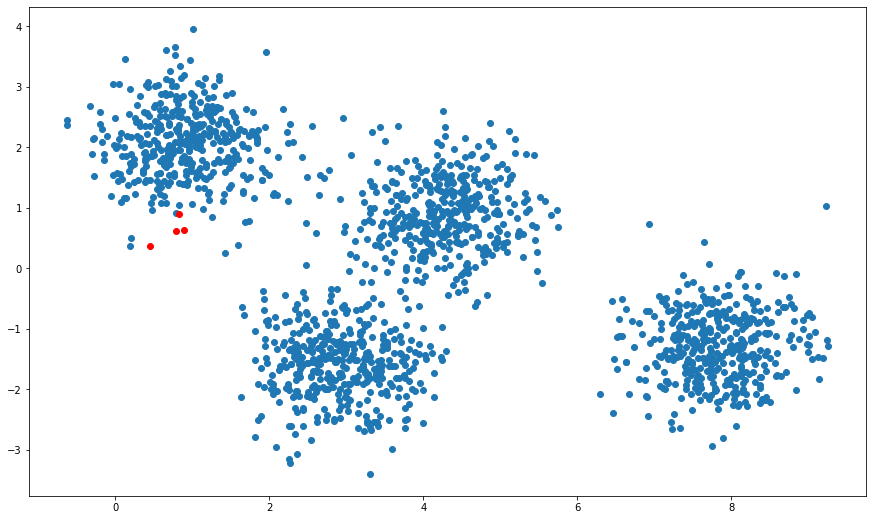

In [260]:
sigmas = maths.random.random(size=(number_of_clusters,number_of_attributes,number_of_attributes))
means = maths.random.random((number_of_clusters,number_of_attributes,1))
probabilities = maths.random.random(size = number_of_clusters)
probabilities = probabilities/sum(probabilities)
print(probabilities)

ratio = 6/10
width = 15
figsize = (width, width*ratio)
figure = graph.figure(figsize = figsize)
graph.scatter(df_raw['x'],df_raw['y'])
graph.scatter(means[0][0],means[0][1],c = 'red')
graph.scatter(means[1][0],means[1][1],c = 'red')
graph.scatter(means[2][0],means[2][1],c = 'red')
graph.scatter(means[3][0],means[3][1],c = 'red')
loop = 0
errors = []

In [319]:
tolerance = 1e-2

converged = False
while not converged :
    p_i = []
    for cluster in range(0,number_of_clusters) :
        p_ij = []
        for datapoint in range(0 , number_of_datapoints) :
            x = maths.array(df_raw.iloc[datapoint]).reshape(-1,1)
            det = maths.linalg.det(sigmas[cluster])
            inv = maths.linalg.inv(sigmas[cluster])
            p_ij.append(probabilities[cluster] *  multivariate_gaussian_distribution(x, means[cluster], inv, det))
       
        p_i.append(maths.array(p_ij))
    p_i = maths.matrix(p_i)
    p_i = p_i / p_i.sum(axis = 0)

    for cluster in range(0,number_of_clusters) :
        means[cluster] = ((p_i[cluster] @ df_raw )/p_i[cluster].sum()).T
        sigma = 0
        for datapoint in range(number_of_datapoints) :
            x = maths.array(df_raw.iloc[datapoint]).reshape(-1,1)
            sigma = sigma + p_i[cluster,datapoint] * (x - means[cluster]) @ (x - means[cluster]).T
        sigma = sigma / (p_i[cluster].sum() - 1)
        probabilities[cluster] = p_i[cluster].sum()/number_of_datapoints
        
#         for datapoint
    
    converged = True    
    

In [320]:
[i-1 for i in probabilities if maths.linalg.norm(i-(1/number_of_clusters)) > tolerance]

[-0.7959053962121536, -0.9499407769512466, -0.5036411831523959]

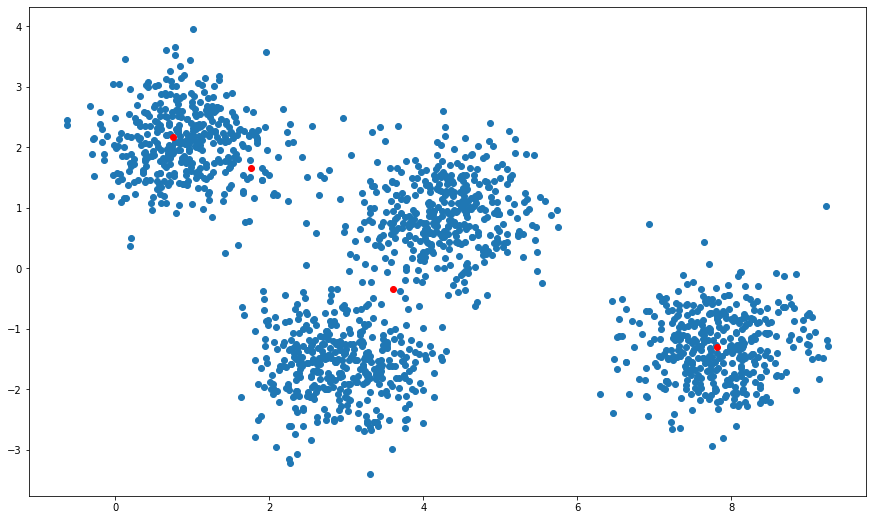

In [309]:
ratio = 6/10
width = 15
figsize = (width, width*ratio)
figure = graph.figure(figsize = figsize)
graph.scatter(df_raw['x'],df_raw['y'])
graph.scatter(means[0][0],means[0][1],c = 'red')
graph.scatter(means[1][0],means[1][1],c = 'red')
graph.scatter(means[2][0],means[2][1],c = 'red')
graph.scatter(means[3][0],means[3][1],c = 'red')

In [310]:
probabilities

array([0.24948729, 0.20441864, 0.04974791, 0.49634615])

In [198]:
maths.argmax(maths.matrix(p_i).sum(axis = 1))

2